In [1]:
import LHE_RnW as reader
import numpy as np
import hist


In [2]:
path_to_madgraph = '/Users/innesbigaran/madstuff/devJuly2024'

In [5]:
lhe_fileME=path_to_madgraph+"/EVAnlp_emu_hh_FullME_5TeV/events/run_01/unweighted_events.lhe"
PlotME=reader.FillHistogram(reader.processfile2h(lhe_fileME)) 

Number of events: 400000
Cross Section (pb): 0.001661913
Weight (pb): 4.1547825e-09
1611.3825352350386


In [6]:
lhe_LLA=path_to_madgraph+"/EVA_w0w0_hh_5TeV_muf250/events/run_01/unweighted_events.lhe"
PlotLLA=reader.FillHistogram(reader.processfile2h(lhe_LLA)) 

Number of events: 400000
Cross Section (pb): 0.001832194
Weight (pb): 4.580485e-09
1768.296234248681


In [7]:
lhe_LP=path_to_madgraph+"/EVA_w0w0_hh_5TeV_muf250/events/run_02/unweighted_events.lhe"
PlotLP=reader.FillHistogram(reader.processfile2h(lhe_LP)) 

Number of events: 400000
Cross Section (pb): 0.001505786
Weight (pb): 3.764465e-09
1453.4185273857775


In [8]:
lhe_NLP=path_to_madgraph+"/EVA_w0w0_hh_5TeV_muf250/events/run_03/unweighted_events.lhe"
PlotNLP=reader.FillHistogram(reader.processfile2h(lhe_NLP)) 

Number of events: 400000
Cross Section (pb): 0.001167909
Weight (pb): 2.9197725e-09
1142.2704776782793


In [9]:
lhe_filePublic="/Users/innesbigaran/madstuff/MG5_aMC_v3_5_3/EVAnlp_Benchmark_w0w0_hh_XLO_5TeV/Events/run_01/unweighted_events.lhe" #EWA
PlotLLAPublic=reader.FillHistogram(reader.processfile2h(lhe_filePublic)) 

Number of events: 400000
Cross Section (pb): 0.0025652
Weight (pb): 6.413e-09
2336.473942001657


In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font',**font)
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = 8,6

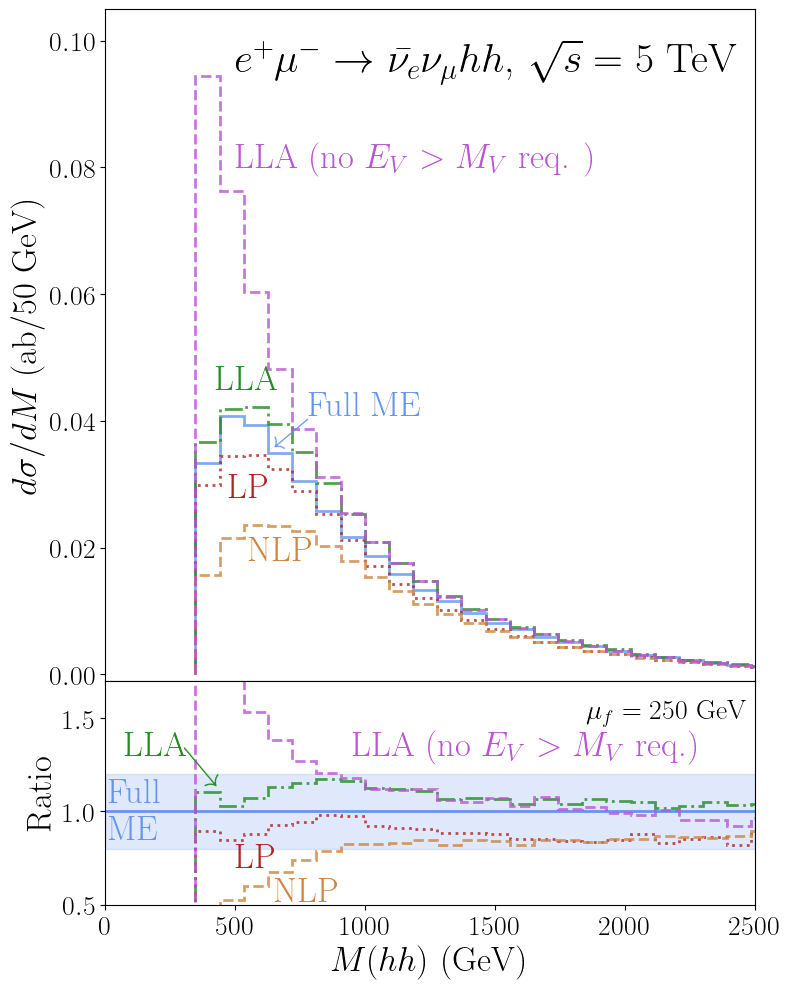

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True,gridspec_kw={'height_ratios': [3, 1], 'hspace':0})
TLsize= 30
Ansize=20
Lsize=25
LSize=25
TitleSize=25
LW=2
ax1.hist(PlotME[0], PlotME[1], weights=PlotME[2]/50, histtype='step',label="Full ME", linestyle='solid', color='cornflowerblue',alpha=0.8,linewidth=LW)
ax1.hist(PlotLLA[0], PlotLLA[1], weights=PlotLLA[2]/50, histtype='step',label="LLA", linestyle='dashdot', color='forestgreen',alpha=0.8,linewidth=LW)
ax1.hist(PlotLP[0], PlotLP[1], weights=PlotLP[2]/50, histtype='step',label="LP", linestyle='dotted', color='firebrick',alpha=0.8,linewidth=LW)
ax1.hist(PlotNLP[0], PlotNLP[1], weights=PlotNLP[2]/50, histtype='step',label="NLP", linestyle='dashed', color='peru',alpha=0.8,linewidth=LW)
ax1.hist(PlotLLAPublic[0], PlotLLAPublic[1], weights=PlotLLAPublic[2]/50, histtype='step',label="LLA $($no $E_V> M_V$)", linestyle='dashed', color='mediumorchid',alpha=0.8,linewidth=LW)

ax2.axhline(1, color="cornflowerblue", alpha=1, linewidth=2)

RatiosLLA=reader.ArrayRatio(PlotLLA[2], PlotME[2])
RatiosLLAPublic=reader.ArrayRatio(PlotLLAPublic[2], PlotME[2])
RatiosLP=reader.ArrayRatio(PlotLP[2], PlotME[2])
RatiosNLP=reader.ArrayRatio(PlotNLP[2], PlotME[2])


ax2.axhspan(0.8, 1.2, color="cornflowerblue", alpha=0.2)
ax2.hist(PlotLLA[0], PlotLLA[1], weights=RatiosLLA, histtype='step',label="LLA",linestyle='dashdot',color='forestgreen', alpha=0.8,linewidth=LW)
ax2.hist(PlotLP[0], PlotLP[1], weights=RatiosLP, histtype='step',label="LP",linestyle='dotted', color='firebrick', alpha=0.8,linewidth=LW)
ax2.hist(PlotNLP[0], PlotNLP[1], weights=RatiosNLP, histtype='step',label="NLP",linestyle='dashed', color='peru', alpha=0.8,linewidth=LW)
ax2.hist(PlotLLAPublic[0], PlotLLAPublic[1], weights=RatiosLLAPublic, histtype='step',label="LLA Public",linestyle='dashed', color='mediumorchid', alpha=0.8,linewidth=LW)


ax1.annotate("LLA $($no $E_V> M_V$ req. )", (500,0.08), fontsize=LSize, color='mediumorchid')
ax1.annotate("LLA ", (420,0.045), fontsize=LSize, color='forestgreen')
ax1.annotate("Full ME", (780,0.041), fontsize=LSize, color='cornflowerblue')
ax1.annotate("$\\longrightarrow$", (600,0.035), fontsize=22, color='cornflowerblue', rotation =-140)
ax1.annotate("LP", (470,0.028), fontsize=LSize, color='firebrick')
ax1.annotate("NLP", (550,0.018), fontsize=LSize, color='peru')

ax1.annotate("$e^+ \mu^- \\to \\bar{\\nu_{e}}\\nu_{\\mu} h h$, $\sqrt{s}=5$ TeV ", (500,0.095), fontsize=TLsize, color='black')
ax2.annotate( "$\\mu_f=250$ GeV", (1850,1.5), fontsize=20, color='black')

ax2.annotate("Full", (10,1.05), fontsize=LSize, color='cornflowerblue')
ax2.annotate("ME", (10,0.85), fontsize=LSize, color='cornflowerblue')
ax2.annotate("NLP", (650,0.52), fontsize=LSize, color='peru')
ax2.annotate("LP", (500,0.7), fontsize=LSize, color='firebrick')
ax2.annotate("LLA $($no $E_V> M_V$ req.)", (950,1.3), fontsize=LSize, color='mediumorchid')
ax2.annotate("$\\longrightarrow$", (250,1.1), fontsize=LSize, color='forestgreen', rotation =-50)
ax2.annotate("LLA", (70,1.3), fontsize=LSize, color='forestgreen')

plt.xlim(0, 2500)
ax2.set_ylim(0.5, 1.7)
ax1.set_ylim(-0.001, 0.105)

ax1.set_ylabel(r'$d\sigma/dM$ (ab/50 GeV)',fontsize=TitleSize)
ax2.set_xlabel(r'$M (hh)$ (GeV)', fontsize=TitleSize)
ax2.set_ylabel(r'Ratio',fontsize=TitleSize)
ax1.tick_params(axis='both', labelsize=Ansize)
ax2.tick_params(axis='both', labelsize=Ansize)

plt.tight_layout()
plt.savefig("hh_5TeV.png", dpi=200)